<a href="https://colab.research.google.com/github/RafsanJany-44/ARC/blob/master/ML_Assignment_FN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing Libraries

In [10]:

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

#reading the dataset

In [3]:

df =  pd.read_csv('/content/bank-full.csv', sep = ';')

In [4]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


#dataset information

In [5]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


#shape of dataset

In [7]:

df.shape

(45211, 17)

#Checking Null values for each columns

In [9]:

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

#Visualize the distribution of the target variable

In [19]:
df["y"].value_counts()

no     39922
yes     5289
Name: y, dtype: int64

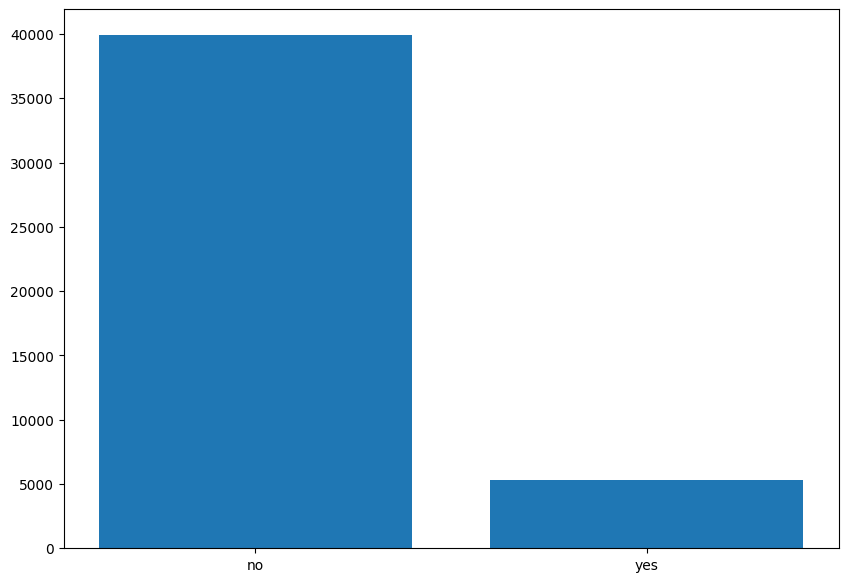

In [21]:

no = ["no","yes"]
yes = [39922,5289]
fig = plt.figure(figsize =(10, 7))
plt.bar(name[0:10], price[0:10])
plt.show()

#one hot encoding

In [35]:
#Checking data types
df.dtypes

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

In [54]:
#Automated encoding which column data type is object or cetagorial excepting our target column

for col in df.columns:
  if col!='y' and str(df[col].dtypes)=="object":
    dummies = pd.get_dummies(df[col])
    df = pd.concat([df,dummies],axis='columns').drop([col], axis='columns')

In [55]:
df.shape

(45211, 52)

In [56]:
df

,age,balance,day,duration,campaign,pdays,previous,y,admin.,blue-collar,...,jun,mar,may,nov,oct,sep,failure,other,success,unknown
0,58,2143,5,261,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,no,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,no,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,17,456,2,-1,0,yes,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,17,1127,5,184,3,yes,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,17,508,4,-1,0,no,0,1,...,0,0,0,1,0,0,0,0,0,1


In [57]:
#Checking data types again
df.dtypes

age               int64
balance           int64
day               int64
duration          int64
campaign          int64
pdays             int64
previous          int64
y                object
admin.            uint8
blue-collar       uint8
entrepreneur      uint8
housemaid         uint8
management        uint8
retired           uint8
self-employed     uint8
services          uint8
student           uint8
technician        uint8
unemployed        uint8
unknown           uint8
divorced          uint8
married           uint8
single            uint8
primary           uint8
secondary         uint8
tertiary          uint8
unknown           uint8
no                uint8
yes               uint8
no                uint8
yes               uint8
no                uint8
yes               uint8
cellular          uint8
telephone         uint8
unknown           uint8
apr               uint8
aug               uint8
dec               uint8
feb               uint8
jan               uint8
jul             

In [58]:
#label encoding taregt column (not onehot encoding)
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df["y"]=encoder.fit_transform(df["y"])

#Spliting dataset Into X and y

In [60]:
X = df.loc[:,df.columns!="y"]
y = df['y']

#Data balancing Using SMOTE (Over sampling)

In [61]:
!pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y= smote.fit_resample(X, y)

#Data Splitting
Divide the dataset into a training set (70%), a validation set (15%), and a test set (15%)

In [ ]:
!pip install fast_ml

In [96]:

from sklearn.model_selection import train_test_split
X_train, X_test_val, y_train, y_test_val= train_test_split(X,y, test_size=0.3)

#we divided 70:30 = train:test_val. Now we have 70% data in our test set. Then we devided 30% into half. So we have 15% of total data in trest and validation.
X_test, X_val, y_test, y_val= train_test_split(X_test_val, y_test_val, train_size=.5)


In [97]:
X_train.shape[0],X_val.shape[0],X_test.shape[0]

(55890, 11977, 11977)

#Model Selection & Training: